In [54]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bmi_df = pd.read_csv("Resources/BMI.csv")
diabetes_df = pd.read_csv("Resources/diabetes.csv")
gym_df = pd.read_csv("Resources/gym_data.csv")
food_df = pd.read_csv("Resources/fast_food_restaurants.csv")

In [6]:
#clean data (from ETL.ipynb)
state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia' : 'DC'}

gym_df['State'] = gym_df['State'].map(state_abbrev).fillna(gym_df['State'])

gym_df.rename({'Most Gyms in State':'Common_Type',
               'Population (2016)':'Population_2016',
               'People Per Gym':'People_per_Gym',
               'Gyms per Capita (100,000)':'Gyms_per_Capita'
    }, axis='columns', inplace=True)

gym_df['Total']=gym_df['Total'].astype(str).str.replace(',','')
gym_df['Population_2016'] = gym_df['Population_2016'].astype(str).str.replace(',','')
gym_df['People_per_Gym']=gym_df['People_per_Gym'].astype(str).str.replace(',','')

gym_df['Total']=gym_df['Total'].astype('int32')
gym_df['Population_2016']=gym_df['Population_2016'].astype('int32')
gym_df['People_per_Gym']=gym_df['People_per_Gym'].astype('float64')

food_df=food_df.dropna(how='any', axis=0)
food_df.drop(['id','dateAdded','dateUpdated','address','categories','primaryCategories','keys','sourceURLs','websites'],axis=1)

,city,country,latitude,longitude,name,postalCode,province
0,Greeley,US,40.396290,-104.696990,Carl's Jr.,80631,CO
1,Grand Junction,US,39.081350,-108.586890,Del Taco,81505,CO
2,Grand Junction,US,39.091480,-108.554110,Which Wich,81506,CO
3,Aurora,US,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO
4,Denver,US,39.740440,-104.926360,Taco Bell,80220,CO
...,...,...,...,...,...,...,...
9995,Bessemer,US,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL
9996,Raleigh,US,35.884500,-78.737541,Luxury Box,27613-6996,NC
9997,Plover,US,44.453180,-89.543170,McDonald's,54467,WI
9998,Hendersonville,US,36.308262,-86.607339,Pizza Hut,37075,TN


In [7]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# summary stats of diabetes df
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#summary stats by outcome
stats = diabetes_df.groupby(['Outcome']).describe()
print(stats)

        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.96

In [35]:
stats_df=pd.DataFrame(stats)
stats_df=stats_df.T
stats_df

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

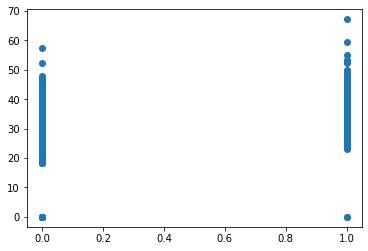

In [43]:
x = diabetes_df['Outcome']
y1 = diabetes_df['BMI']
y2 = diabetes_df['Age']

plt.scatter(x, y1)
#plt.scatter(x, y2, c='skyblue')
plt.show()

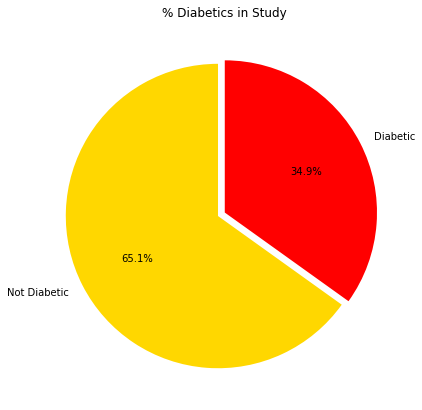

In [51]:
# pie chart of %diabetic 

labels = ['Not Diabetic', 'Diabetic']
sizes = diabetes_df['Outcome'].value_counts(sort = True)
colors = ["gold","red"]
explode = (0.05,0)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90,)
plt.title('% Diabetics in Study')
plt.show()

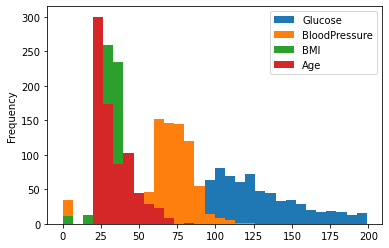

In [52]:
# testing out histograms
diabetes_df[["Glucose", "BloodPressure", "BMI",  "Age"]].plot(bins=30, kind="hist")

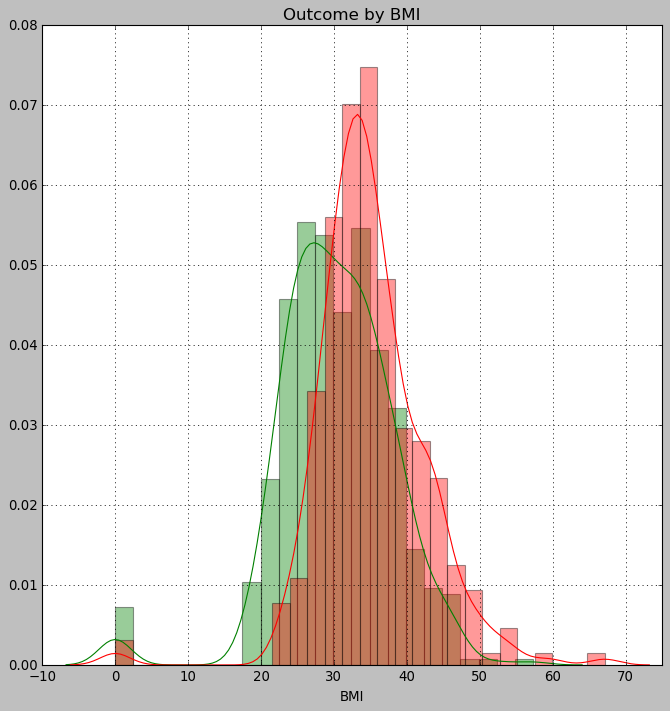

In [63]:
# histograms by outcome (green = good, red = bad)

plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["BMI"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["BMI"], color='red') 
plt.title('Outcome by BMI', fontsize=15)
plt.xlim([-10,75])
plt.grid(linewidth = 0.7)
plt.show()

BMI is a good indicator of diabetes

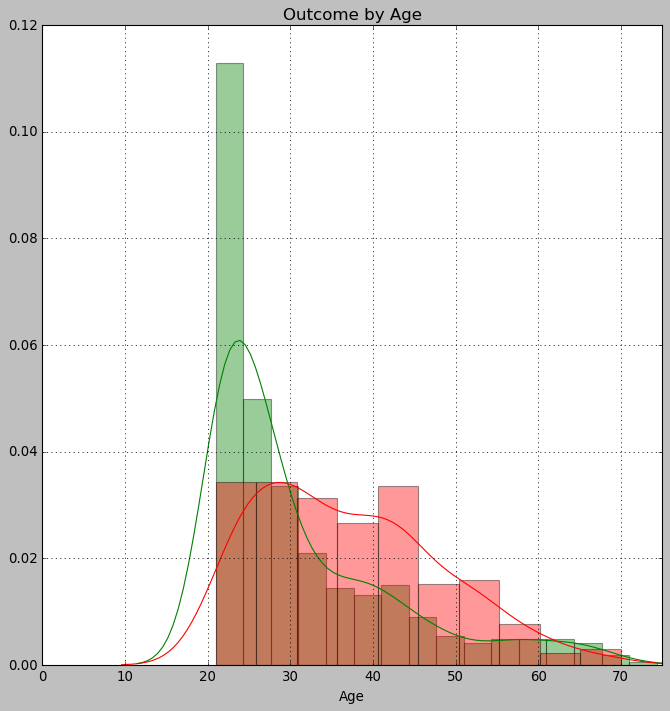

In [64]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["Age"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["Age"], color='red') 
plt.title('Outcome by Age', fontsize=15)
plt.xlim([0,75])
plt.grid(linewidth = 0.7)
plt.show()

If over 30, age can be an indicator of diabetes

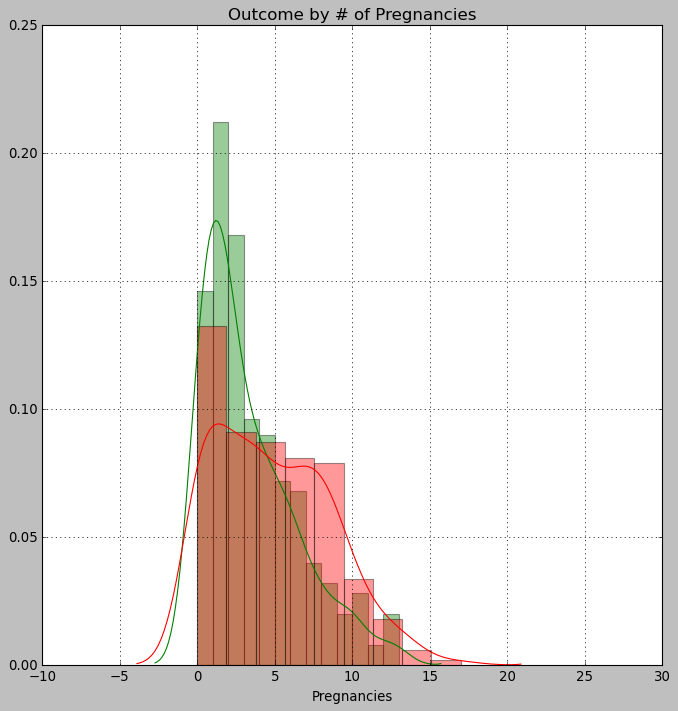

In [68]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["Pregnancies"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["Pregnancies"], color='red') 
plt.title('Outcome by # of Pregnancies', fontsize=15)
plt.xlim([-10,30])
plt.grid(linewidth = 0.7)
plt.show()

Number of Pregnancies is not a good indicator of diabetes.

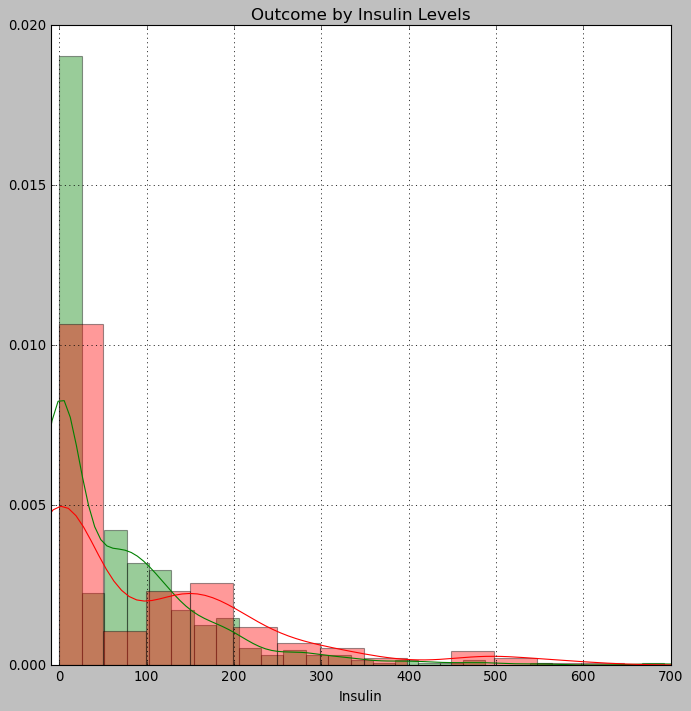

In [72]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["Insulin"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["Insulin"], color='red') 
plt.title('Outcome by Insulin Levels', fontsize=15)
plt.xlim([-10, 700])
plt.grid(linewidth = 0.7)
plt.show()

Generally diabetic if insulin levels over 100

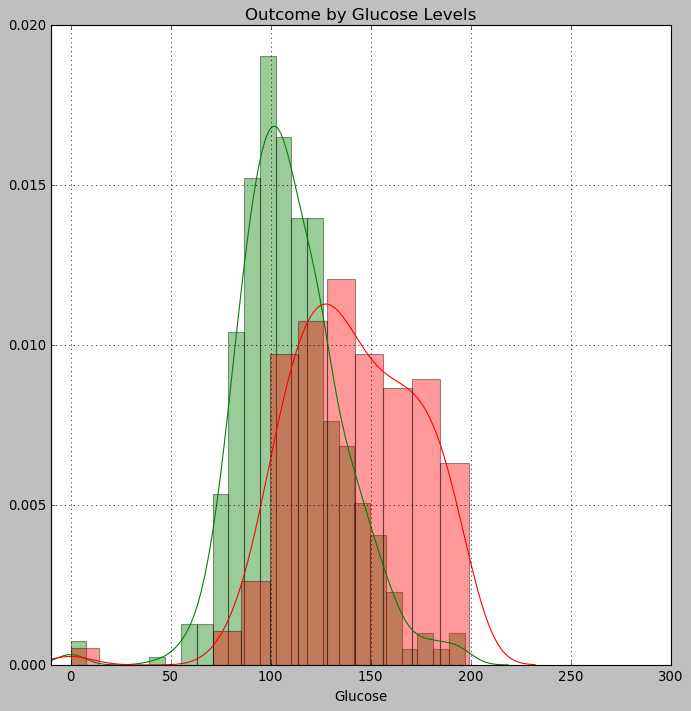

In [75]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["Glucose"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["Glucose"], color='red') 
plt.title('Outcome by Glucose Levels', fontsize=15)
plt.xlim([-10, 300])
plt.grid(linewidth = 0.7)
plt.show()

Glucose levels over ~120 good indicator of diabetes

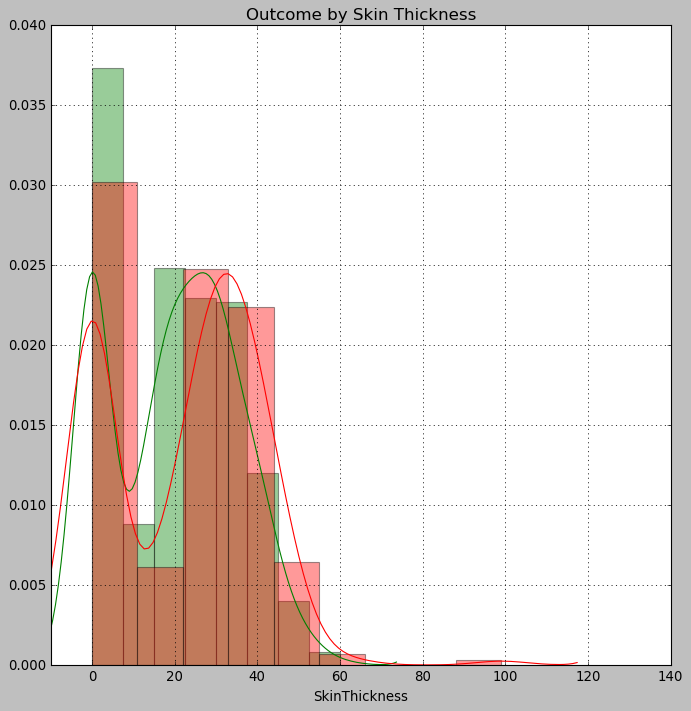

In [78]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["SkinThickness"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["SkinThickness"], color='red') 
plt.title('Outcome by Skin Thickness', fontsize=15)
plt.xlim([-10, 140])
plt.grid(linewidth = 0.7)
plt.show()

Skin thickness not a good indicator for diabetes

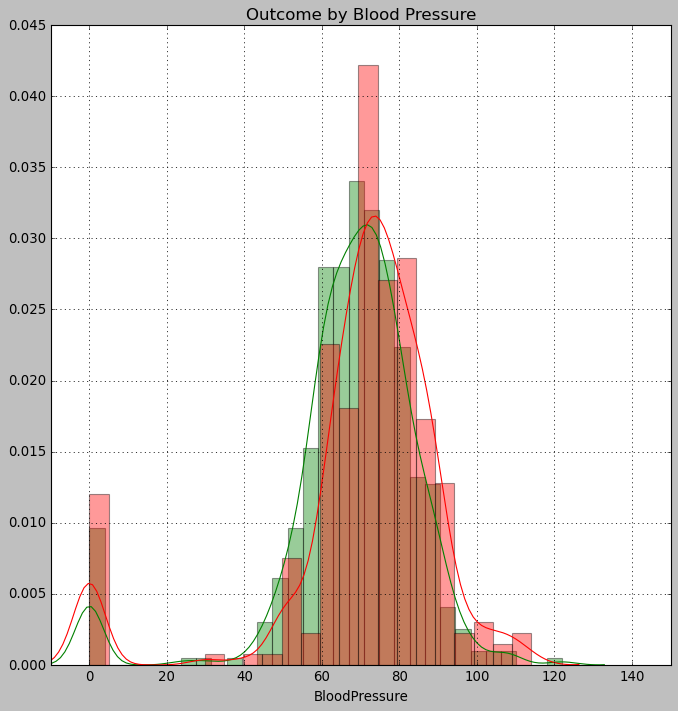

In [81]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["BloodPressure"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["BloodPressure"], color='red') 
plt.title('Outcome by Blood Pressure', fontsize=15)
plt.xlim([-10, 150])
plt.grid(linewidth = 0.7)
plt.show()

BP is closely distributed, but generally those with diabetes have slightly higher BP

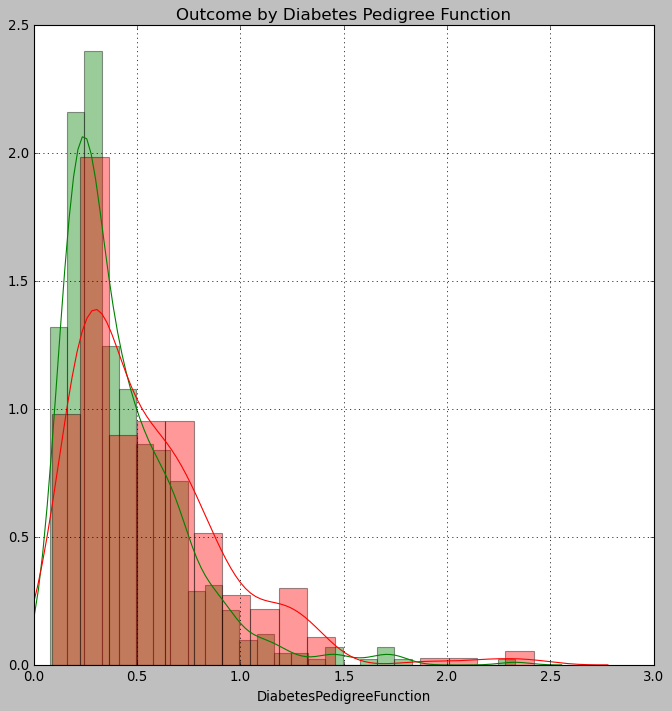

In [85]:
plt.figure(figsize=(10,10))
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 0]["DiabetesPedigreeFunction"], color='green') 
sns.distplot(diabetes_df[diabetes_df['Outcome'] == 1]["DiabetesPedigreeFunction"], color='red') 
plt.title('Outcome by Diabetes Pedigree Function', fontsize=15)
plt.xlim([0, 3])
plt.grid(linewidth = 0.7)
plt.show()

As the function increases, could mean that diabetes is hereditary for those diagnosed with it.